In [1]:
# Clone the GitHub
!git clone https://github.com/atikul-islam-sajib/ml_helpers.git

Cloning into 'ml_helpers'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 74 (delta 37), reused 48 (delta 16), pack-reused 0
Receiving objects: 100% (74/74), 21.00 KiB | 10.50 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
# Change the directory
%cd /content/ml_helpers/

/content/ml_helpers


In [3]:
# Install the requirements
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.2/231.2 kB 1.9 MB/s eta 0:00:00


#Import the modules

In [4]:
# Import the module
from src.classifier import CustomRandomForestClassifier
from src.regressor import CustomRandomForestRegressor
from src.benchmark_evalaute import evaluate_datasets
from src.chart import Charts

#Define the Dataset Classification

In [5]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=42
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###predict the model with weight(Uniform)

In [6]:
# Predict the model
clf = CustomRandomForestClassifier(n_estimators=10)
clf.fit(X, y)
print(clf.predict(X[:5], weights="uniform"))

# Using predict_proba that provide probabilites

clf = CustomRandomForestClassifier(n_estimators=10)
clf.fit(X, y)
print(clf.predict_proba(X[:5], weights="uniform"))

[1 0 0 1 1]
[[0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.1 0.9]]


###Predict the model with weight(expOOB)

In [7]:
# Predict the model
clf = CustomRandomForestClassifier(n_estimators=10)
clf.fit(X, y)
print(clf.predict(X[:5], weights="expOOB"))

# Using predict_proba that provide probabilites

clf = CustomRandomForestClassifier(n_estimators=10)
clf.fit(X, y)
print(clf.predict_proba(X[:5], weights="expOOB"))

[1 0 0 1 1]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


#Define the Dataset for Regressor

In [8]:
from sklearn.datasets import make_regression
X, y = make_regression(
    n_samples=1000, n_features=4, n_informative=2, noise=0.5, random_state=42)

####Predict the model with weight(uniform)

In [9]:
# Predict the model with weight - uniform
reg = CustomRandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X, y)
print(reg.predict(X[:5], weights = "uniform"))

[-17.97860333  82.48225867  40.8653016   94.58508302 -95.30508413]


####Predict the mdoel with weights(expOOB)

In [10]:
# Predict the model
reg = CustomRandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X, y)
print(reg.predict(X[:5], weights = "expOOB"))

[-17.4208611   83.22540804  40.09542304  94.43333363 -94.54827658]


#Test with Benchmarking Data

In [11]:
if __name__ == "__main__":

    # Define your datasets
    classification_datasets = ["diabetes", "breast_cancer", "heart", "haberman"]
    regression_datasets = ["fico", "enhancer", "credit_g", "juvenile_clean"]

    # Evaluate classification datasets
    df_classification_scores = evaluate_datasets(
        classification_datasets, task_type="classification"
    )

    # Evaluate regression datasetss
    df_regression_scores = evaluate_datasets(
        regression_datasets, task_type="regression"
    )

    # Print scores for each dataset
    print("Classification Scores:")
    print(df_classification_scores)
    print("=" * 100)
    print("\nRegression Scores:")
    print(df_regression_scores)

fetching diabetes from pmlb
fetching heart from imodels
fetching fico from imodels
fetching credit_g from imodels
Classification Scores:
         Dataset   Default    expOOB
0       diabetes  0.830926  0.830370
1  breast_cancer  0.828231  0.828231
2          heart  0.915584  0.916306
3       haberman  0.624369  0.623737

Regression Scores:
          Dataset   Default    expOOB
0            fico  0.448790  0.448789
1        enhancer  0.245904  0.245917
2        credit_g  0.398569  0.398691
3  juvenile_clean  0.262467  0.262477


#Display the tree for Classifier

fetching heart from imodels


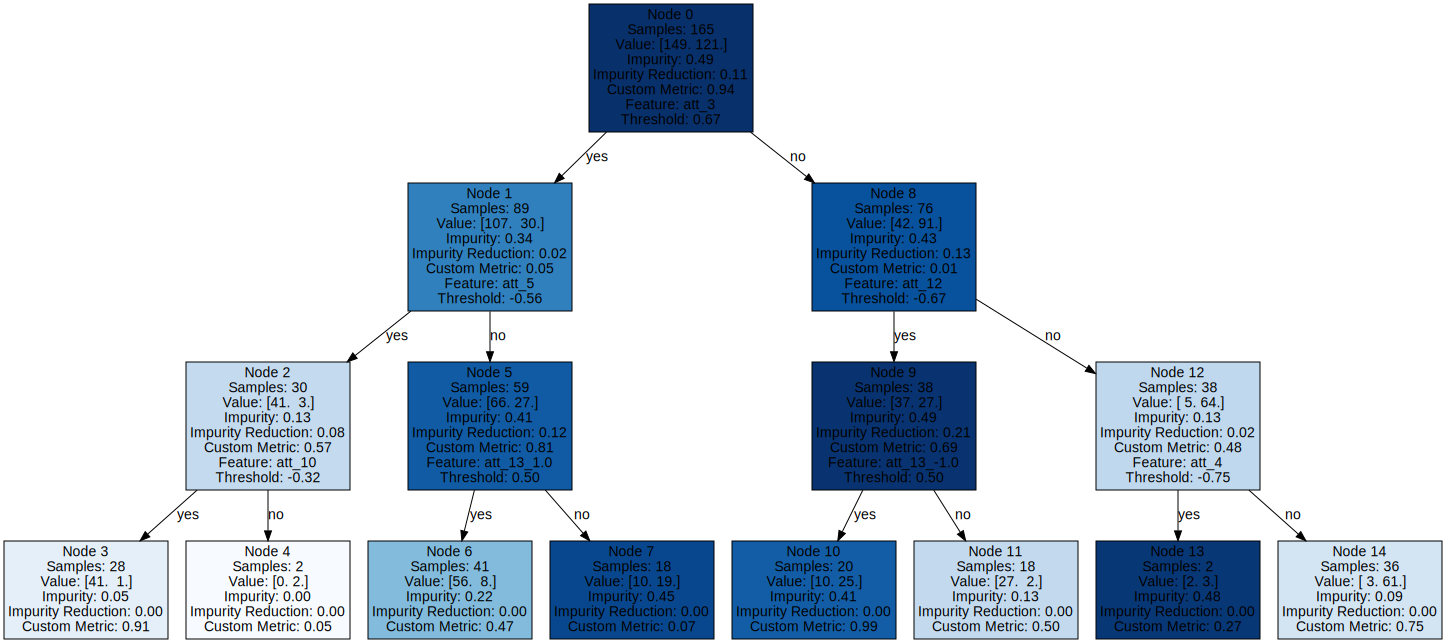

In [12]:
# Import the datasets from imodels
from imodels.util.data_util import get_clean_dataset
X, y, feature_names = get_clean_dataset('heart')

model = CustomRandomForestClassifier(n_estimators=3, max_depth=3)
model.fit(X, y)

charts = Charts()
graph = charts.plot_tree(model, feature_names, y)
graph


# '''
# This will work also for scikit-learn RF, DT:
# -------------------------------------------
# >>>> model = RandomForestClassifier(n_estimators=3, max_depth=3)
# >>>> model.fit(X, y)

# >>>> charts = Charts()
# >>>> graph = charts.plot_tree(model, feature_names, y)
# >>>> graph
# '''

# Display Tree for Regressor

fetching credit_g from imodels


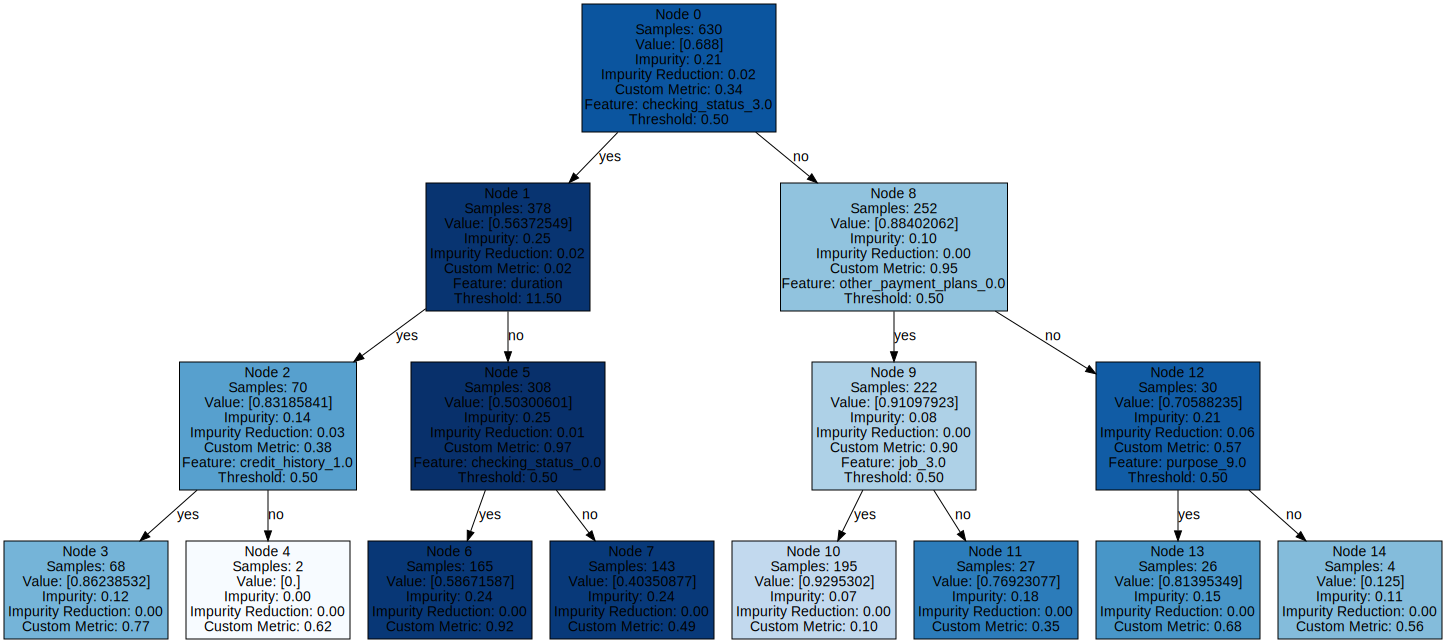

In [13]:
# Import the data from imodels
from imodels.util.data_util import get_clean_dataset
X, y, feature_names = get_clean_dataset('credit_g')

model = CustomRandomForestRegressor(n_estimators=3, max_depth=3)
model.fit(X, y)

charts = Charts()
graph = charts.plot_tree(model, feature_names, y)
graph


# '''
# This will work also for scikit-learn RF, DT:
# -------------------------------------------
# >>>> model = RandomForestRegressor(n_estimators=3, max_depth=3)
# >>>> model.fit(X, y)

# >>>> charts = Charts()
# >>>> graph = charts.plot_tree(model, feature_names, y)
# >>>> graph
# '''